In [1]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import sklearn.neural_network as nn
from scipy.stats import norm
%matplotlib inline

In [30]:
hypnames = ['Even','Odd','Squares','Pow2', 'Pow4','Pow16','Mult5','Mult10','Num15to25','Num1to100']

In [47]:
workbook = xlrd.open_workbook('/Users/chandola/Downloads/Class_03_08_2017__09_26_1Q_quickquestion20170308926.xlsx')
worksheet = workbook.sheet_by_name(workbook.sheet_names()[0])
num_rows = worksheet.nrows - 1
curr_row = -1
flag = False
vals = []
while curr_row < num_rows:
    curr_row += 1
    row = worksheet.row(curr_row)
    cell_value = worksheet.cell_value(curr_row, 0)
    if flag:
        try:
            cval = int(cell_value)
            
            vals.append(cval)
        except ValueError:
            continue
    if('Student' in str(cell_value)):
        flag = True
vals = np.array(vals)
#plt.hist(vals)
nvals = np.bincount(vals,minlength=11)

nvals = nvals[1:11]
nvals = nvals/np.sum(nvals[1:11])


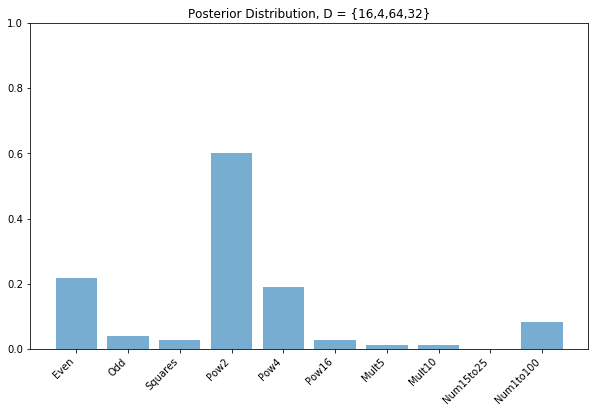

In [48]:
fig = plt.figure(figsize=[10,6])
plt.bar(range(1,11),list(nvals),alpha=0.6)
xt = plt.xticks(range(1,11))
ax = plt.gca()
ax.set_xticklabels(hypnames,rotation=45,ha='right')
plt.ylim([0,1])
plt.title('Posterior Distribution, D = {16,4,64,32}')
plt.savefig('/Users/chandola/cse574/slides/images/socrativeexp2017_posteriord2.png',dpi=240)

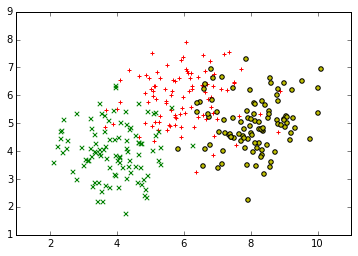

In [37]:
# generate data

n = 100
data = np.random.multivariate_normal([6,6],[[1,0],[0,1]],n)
labels = 0*np.ones([data.shape[0],1])

n = 100
data1 = np.random.multivariate_normal([4,4],[[1,0],[0,1]],n)
labels1 = 1*np.ones([data1.shape[0],1])

data = np.vstack([data1,data])
labels = np.vstack([labels1,labels])

n = 100
data1 = np.random.multivariate_normal([8,5],[[1,0],[0,1]],n)
labels1 = 2*np.ones([data1.shape[0],1])

data = np.vstack([data1,data])
labels = np.vstack([labels1,labels]).flatten()

plt.scatter(data[labels == 0,0],data[labels == 0,1],c='r',marker='+')
plt.scatter(data[labels == 1,0],data[labels == 1,1],c='g',marker='x')
plt.scatter(data[labels == 2,0],data[labels == 2,1],c='y')

In [1]:
mexico = [4.72, 4.15, 4.46, 4.23, 5.28, 4.07, 4.67, 4.87, 4.54, 3.75]
boston = [5.76, 5.12, 5.64, 5.59, 5.54, 5.09, 5.46, 5.87, 5.71, 5.56]

In [13]:
m_mean = np.mean(mexico)
m_std = np.std(mexico)
b_mean = np.mean(boston)
b_std = np.std(boston)
m_mle = norm(m_mean,m_std)
b_mle = norm(b_mean,b_std)

In [14]:
p_m_mean = 4.4
p_m_std = 0.5
p_b_mean = 5.0
p_b_std = 0.7
m_prior = norm(p_m_mean,p_m_std)
b_prior = norm(p_b_mean,p_b_std)


In [21]:
a = 4.6
b = 4.9
print "Prob that A is born in Mexico City according to prior estimates = "+str(m_prior.pdf(a))
print "Prob that B is born in Mexico City according to prior estimates = "+str(m_prior.pdf(b))

print "     Prob that A is born in Boston according to prior estimates = "+str(b_prior.pdf(a))
print "     Prob that B is born in Boston according to prior estimates = "+str(b_prior.pdf(b))


print "Prob that A is born in Mexico City according to MLE estimates = "+str(m_mle.pdf(a))
print "Prob that B is born in Mexico City according to MLE estimates = "+str(m_mle.pdf(b))

print "     Prob that A is born in Boston according to MLE estimates = "+str(b_mle.pdf(a))
print "     Prob that B is born in Boston according to MLE estimates = "+str(b_mle.pdf(b))


Prob that A is born in Mexico City according to prior estimates = 0.736540280607
Prob that B is born in Mexico City according to prior estimates = 0.483941449038
     Prob that A is born in Boston according to prior estimates = 0.484068479653
     Prob that B is born in Boston according to prior estimates = 0.564131628472
Prob that A is born in Mexico City according to MLE estimates = 0.908572570334
Prob that B is born in Mexico City according to MLE estimates = 0.567880803477
     Prob that A is born in Boston according to MLE estimates = 0.000942435640237
     Prob that B is born in Boston according to MLE estimates = 0.0528698790113


In [3]:
X = np.array([[2,2],[7,5],[6,3],[3,1]])

In [4]:
y = np.array([1,1,-1,-1])

(0, 8)

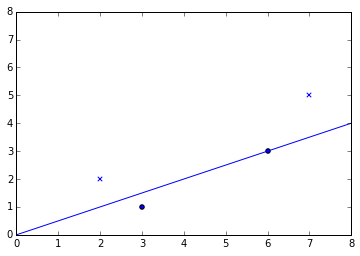

In [18]:
plt.scatter(X[0:2,0],X[0:2,1],marker='x')
plt.scatter(X[2:4,0],X[2:4,1],marker='o')
a = 0.5
c = 0
p1 = [0,c+a*0]
p2 = [(6.0-c)/a,6]
plt.plot([p1[0],p2[0]],[p1[1],p2[1]])
plt.xlim([0,8])
plt.ylim([0,8])

In [57]:
X = np.array([[2],[1],[4],[3]])
y = np.array([2,3,1,4])
y = y[:,np.newaxis]
X = np.hstack([X,np.ones([X.shape[0],1])])
print X
print y

[[ 2.  1.]
 [ 1.  1.]
 [ 4.  1.]
 [ 3.  1.]]
[[2]
 [3]
 [1]
 [4]]


In [41]:
ws = [np.array([[.5],[1.5]]),np.array([[.5],[3.0]]),np.array([[1.5],[0.5]]),np.array([[.5],[2.0]])]

for w in ws:
    alpha = 1
    J2 = 0.5*np.sum((np.dot(X,w) - y)**2) +0.5*alpha*np.dot(np.transpose(w),w)

    print J2

[[ 3.5]]
[[ 11.375]]
[[ 6.5]]
[[ 4.875]]


In [58]:
ws = [np.array([[.5],[1.5]]),np.array([[.0],[2.5]]),np.array([[1.5],[0.5]]),np.array([[2.5],[.0]])]

for w in ws:
    alpha = 1
    J3 = 0.5*np.sum((np.dot(X,w) - y)**2) + 0.5*alpha*np.sum(np.abs(w))
    print J3

5.25
3.75
18.25
52.5


In [56]:
w = ws[0]
0.5*np.sum((np.dot(X,w) - y)**2)

2.25

In [51]:
print X

[[ 2.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]]


In [53]:
from sklearn import linear_model

In [149]:
model = linear_model.Ridge(fit_intercept=False)

In [150]:
model.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [151]:
print model.coef_
print model.intercept_

[ 0.80645161  0.70967742]
0.0


In [67]:
model1 = linear_model.Lasso()
model1.fit(X,y)
print model1.intercept_
print model1.coef_

2.5
[ 0.]


In [87]:
R = np.array([[1,0],[0.4,0.6],[0,1]])
print R

[[ 1.   0. ]
 [ 0.4  0.6]
 [ 0.   1. ]]


In [99]:
X = [1,10,20]
X2 = [x**2 for x in X]

In [90]:
pi = np.sum(R,axis=0)/3
print pi

[ 0.46666667  0.53333333]


In [96]:
mu_1 = np.sum(R[:,0]*X)/np.sum(R[:,0])
mu_2 = np.sum(R[:,1]*X)/np.sum(R[:,1])
print mu_1
print mu_2

3.57142857143
16.25


In [101]:
sigma_1 = (np.sum(R[:,0]*X2)/np.sum(R[:,0])) - mu_1**2
sigma_2 = (np.sum(R[:,1]*X2)/np.sum(R[:,1])) - mu_2**2


In [102]:
print sigma_1
print sigma_2

16.5306122449
23.4375


In [103]:
X = np.array([[0,0],[0,10],[10,0],[10,10],[4,4],[4,6],[6,4],[6,6]])

/Users/chandola/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


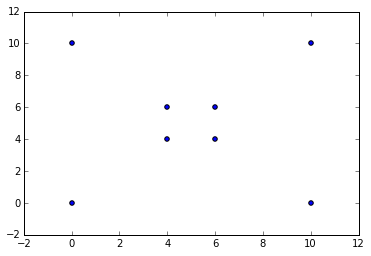

In [104]:
plt.scatter(X[:,0],X[:,1])

In [105]:
import scipy.stats as st

In [113]:
X = np.array([[-2,-4,-6],[-1,-3,-5],[0,0,0],[1,3,5],[2,4,6]])

In [115]:
e,v = np.linalg.eig(np.cov(np.transpose(X)))

In [116]:
e

array([  4.53677475e+01,   1.32252544e-01,   3.81059486e-19])

In [120]:
np.var(np.dot(X,v[:,0:1]))

36.294197965093666

In [121]:
np.var(np.dot(X,v[:,1:2]))

0.10580203490632742

In [122]:
np.var(np.dot(X,v[:,2:3]))

6.3108872417680948e-31

In [124]:
np.round(v,2)

array([[-0.23, -0.88,  0.41],
       [-0.52, -0.24, -0.82],
       [-0.82,  0.4 ,  0.41]])

In [126]:
np.mean(X,axis=0)

array([ 0.,  0.,  0.])

In [134]:
for i in range(3):
    print " & ".join(["%5.2f"%x for x in v[i,:]])+"\\\\"

-0.23 & -0.88 &  0.41\\
-0.52 & -0.24 & -0.82\\
-0.82 &  0.40 &  0.41\\


In [16]:
h = np.exp(10*np.log(3))
m = (1/0.05)*(1024 + np.log(1/0.1))
print m

20526.0517019


In [18]:
(18.0/125)/((18.0/125) + (2.0/27))


0.6603260869565217

In [ ]:
## COPIED FROM SVD NOTEBOOK
# ignore from here on
X = np.array([[1,1,1,0,0,0],
 [1,1,1,0,0,0],
 [0,0 ,0 ,1 ,1 ,1],
 [0,0 ,0 ,1 ,1 ,1],
 [1,1 ,0 ,0 ,0 ,0]])
print X
U, s, Vh = svd(X)
#plot the elbow plot
plt.plot(s**2)
plt.xlabel("K")
plt.ylabel('$s^2$')
plt.title('Elbow plot for SVD')
plt.show()
#truncate to 2 
s[1:]=0
#calculate estimate using truncated S
outX = np.round(np.dot(np.dot(U,diagsvd(s,5,6)),Vh))

outX1 = np.round(np.dot(U[:,0:1],Vh[0:1,:])*s[0])
#show results
print "X=\n"+str(X)
print "U=\n"+str(U[:1,:].round(2))
print "S=\n"+str(diagsvd(s,5,6).round(2))
print "V=\n"+str(Vh[:,:1].round(2))
print "X'=\n"+str(outX)
print "X'=\n"+str(outX1)

foods = ['Chocolate','Peanuts','Crisps','Wine','Beer','Champagne']
names = ['Annie','Brian','Chuck','Dave','Emma']
print "& "+" & ".join(foods)+"\\\\\hline"
for i in range(len(names)):
    print names[i]+" & "+" & ".join([str(x) for x in X[i,:]])+"\\\\"
U,s,V = svd(X)
S = np.zeros(X.shape)
for i in range(X.shape[0]):
    S[i,i] = s[i]
print U
print S
print V

for i in range(len(names)):
    print " & ".join(["%.2f"%x for x in U[i,:]])+"\\\\"

In [ ]:
for i in range(6):
    print " & ".join(["%.2f"%x for x in V[i,:]])+"\\\\"
    
for i in range(5):
    print " & ".join(["%.2f"%x for x in S[i,:]])+"\\\\"
    
np.round(np.dot(np.dot(U,S),V)) - X

U1 = np.round(U[:,0:1],2)
V1 = np.round(V[0:1,:],2)
S1 = np.round(S[0,0],2)
np.round(np.dot(U1,V1)*S1)
X = np.array([[-2,-4,-6],[-1,-3,-5],[0,0,0],[1,3,5],[2,4,6]])

np.round(np.linalg.eig(np.cov(np.transpose(X)))[1],2)